Following the Machine Learning (ML) pipeline from the lecture videos, you will:

*   Prepare delivery data, the distances and times from past orders.
*   Build a simple neural network using PyTorch (just one neuron!).
*   Train it to find the relationship between distance and delivery time.
*   Predict whether you can make that 7-mile delivery in time.





In [1]:
#Import  the required librarries
!gdown --fuzzy https://drive.google.com/file/d/1leh6eZ6fCTb0xWwx87GZfu3_I2UW5ndl/view?usp=drive_link
import torch
import torch.nn as nn
import torch.optim as optim
import utils

#1. Data ingestion
distances = torch.tensor([[1.0],[2.0],[3.0],[4.0]],dtype = torch.float32)
time =  torch.tensor([[6.96], [12.11], [16.77], [22.21]],dtype = torch.float32)

Downloading...
From (original): https://drive.google.com/uc?id=1leh6eZ6fCTb0xWwx87GZfu3_I2UW5ndl
From (redirected): https://drive.google.com/uc?id=1leh6eZ6fCTb0xWwx87GZfu3_I2UW5ndl&confirm=t&uuid=4961ee92-eefd-4197-8395-116b927fa03e
To: /content/utils.py
100% 8.24k/8.24k [00:00<00:00, 21.7MB/s]


In [2]:
#2. model building
model = nn.Sequential(nn.Linear(1,1))

In [3]:
#3. model training
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

#once we have the loss function and optimizers
epochs = 500
for epoch in range(epochs):
  #intialize the optimizers to zero
  optimizer.zero_grad()

  #make prediction on the data
  prediction = model(distances)

  #calculate the loss
  loss = loss_function(prediction,time)

  #update the weights and biase with backpropogation
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 50 == 0:
    print(f"epoch :{epoch +1}, Loss : {loss.item()}")

epoch :50, Loss : 0.029897289350628853
epoch :100, Loss : 0.02873360738158226
epoch :150, Loss : 0.027874497696757317
epoch :200, Loss : 0.02723787911236286
epoch :250, Loss : 0.026766303926706314
epoch :300, Loss : 0.02641679160296917
epoch :350, Loss : 0.026157911866903305
epoch :400, Loss : 0.025966133922338486
epoch :450, Loss : 0.02582385018467903
epoch :500, Loss : 0.025718582794070244


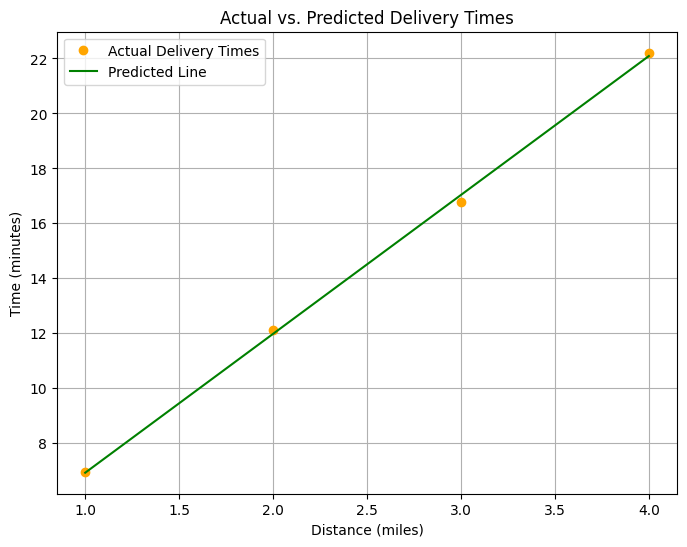

In [4]:
utils.plot_results(model,distances,time)

In [5]:
# 4.inference
test_distance = 7.0

#first need to get the torch into the inference mode
with torch.no_grad():
  test_tensor = torch.tensor([test_distance],dtype=torch.float32)

  # run the inference
  predict = model(test_tensor)


  # print
  print(f"prediction for a {test_distance} - dilvery distance , time require is {predict.item():.1f} minutes")
  if predict.item() > 30:
    print("Dont take the delivery")
  else:
    print("Take the delivery")

prediction for a 7.0 - dilvery distance , time require is 37.3 minutes
Dont take the delivery


In [6]:
#5. Evaluation
# we can access the layer of the models
layer = model[0]
weights = layer.weight.data.numpy()
bias = layer.bias.data.numpy()
print(f"weights:{weights}")
print(f"Bias:{bias}")

weights:[[5.0554013]]
Bias:[1.8676584]


In [7]:
#Testing the model on the new and complex data
new_distances = torch.tensor([[1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]],dtype = torch.float32)
new_times = torch.tensor([[6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]],dtype = torch.float32)

In [8]:
with torch.no_grad():
  preds = model(new_distances)

In [9]:
new_loss = loss_function(preds,new_times)
print(f"Loss:{new_loss.item():.2f}")

Loss:174.72


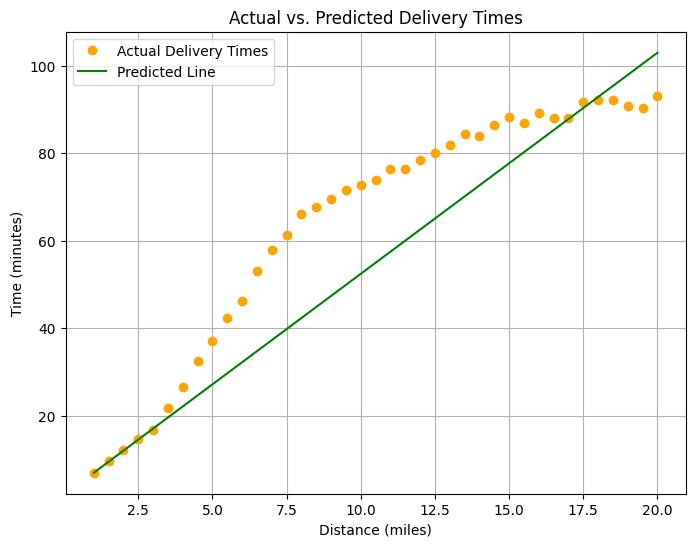

In [10]:
utils.plot_results(model,new_distances,new_times)

In [11]:
from torch.nn.modules.activation import ReLU
# as we can see adding the more complext data like data from other vehicles like car to our delivery model it introduces the non linearity
# in the data pattern , now we need to adapt to that with new model or extension of the model , one thing we can think of is adding more
# neurons but the problem is no matter how many neurons we add all the linear computation w*distance + b will add upto linear as well
# so we will require an activation function lets take Relu for the example , now functionality of Relu is it makes all the values < 0 to 0
# and values >0 to as it is meaning values, if we use one neuron and try to fit that into our curve we will have one bend at 0 but what if
# we apply this to multiple nuerons , let say 3 nuerons , so each neuron gets activated at different value, like 0 and we will get more curvy fit
# just like that by applying more nuerons with activation function we can achieve any smooth curve

new_model = nn.Sequential(
    nn.Linear(1,3),
    nn.ReLU(),
    nn.Linear(3,1)
)

### A New Step: Normalizing the Data

Before building the model, apply a simple data-preparation step called **normalization**. This is a standard technique that improves training stability and effectiveness by adjusting the scale of the data. Normalization helps ensure that large distance values do not dominate the learning process and that gradients remain stable during training. This topic will be explored in more detail in a later module.

- First, compute the **mean** and **standard deviation** for the `distances` and `times` tensors.  
- Next, apply **standardization** to each tensor using its own mean and standard deviation.  
- This process produces two new normalized tensors: `distances_norm` and `times_norm`.

This technique, also known as **z-score normalization**, transforms the original values (ranging from `1.0` to `20.0` miles and approximately `7` to `93` minutes) into a new normalized scale suitable for model training.


In [23]:
#Normalizing the data in to the smaller scale
new_distances_mean = new_distances.mean()
new_times_mean = new_times.mean()

#standard deviation
new_distances_std = new_distances.std()
new_times_std = new_times.std()

#Normalzie data
distance_norm = (new_distances - new_distances_mean) / new_distances_std
times_norm = (new_times - new_times_mean)/new_times_std

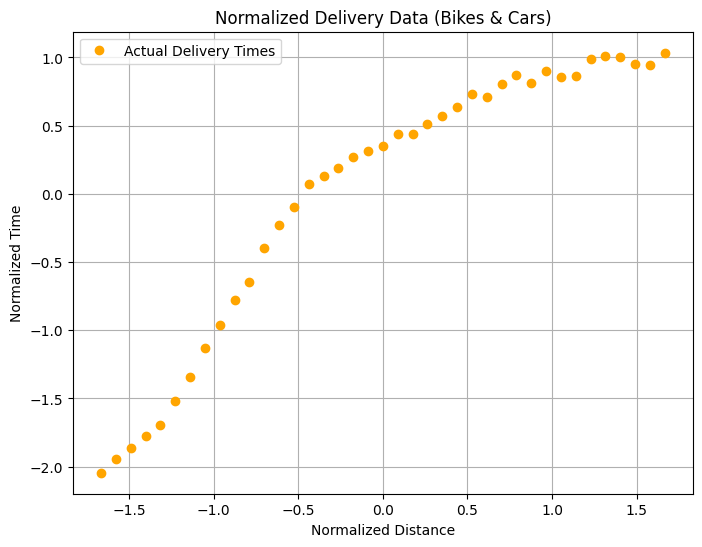

In [24]:
utils.plot_data(distance_norm,times_norm,normalize=True)

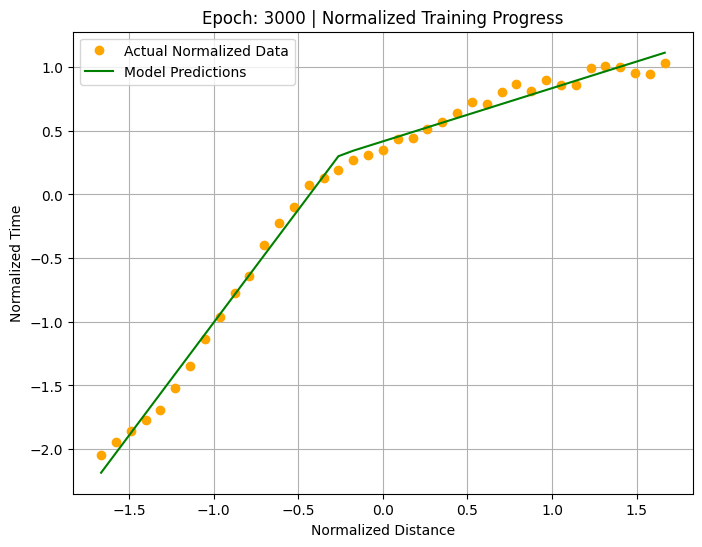


Training Complete.

Final Loss: 0.0052693854086101055


In [26]:
#Train the non-linear model
loss_function_new = nn.MSELoss()
optimizer_new = optim.SGD(new_model.parameters(),lr= 0.01)
for epoch in range(3000):
  optimizer_new.zero_grad()
  pred_time = new_model(distance_norm)
  loss_new = loss_function_new(pred_time,times_norm)
  loss_new.backward()
  optimizer_new.step()

  if (epoch + 1) % 50 == 0:
      utils.plot_training_progress(
            epoch=epoch,
            loss=loss_new,
            model=new_model,
            distances_norm=distance_norm,
            times_norm=times_norm
        )
print("\nTraining Complete.")
print(f"\nFinal Loss: {loss_new.item()}")

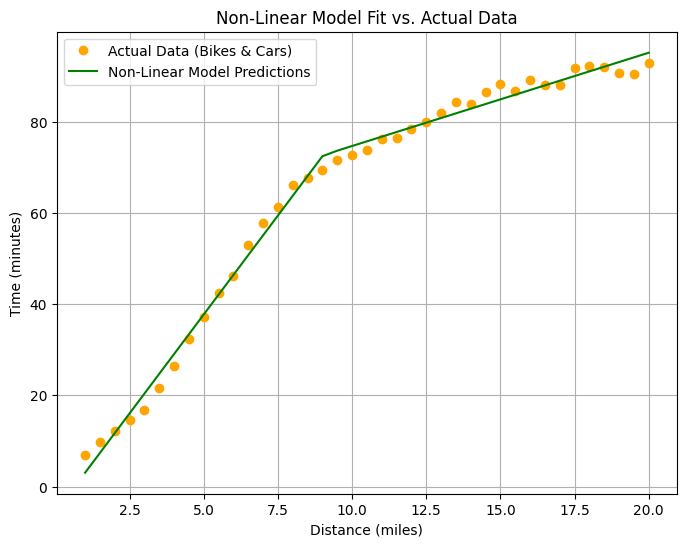

In [29]:
utils.plot_final_fit(new_model, new_distances, new_times, distance_norm, new_times_std, new_times_mean)

In [32]:
#now to do the inference
distance_to_predict = 5.1
with torch.no_grad():
  prediction_tensor = torch.tensor([[distance_to_predict]],dtype=torch.float32)
  prediction_tensor_norm = (prediction_tensor - new_distances_mean)/new_distances_std
  predict_time = new_model(prediction_tensor_norm)

  predicted_time = (predict_time * new_times_std) + new_times_mean

  # --- Decision Making Logic ---
  print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time.item():.1f} minutes")

  # First, check if the delivery is possible within the 45-minute timeframe
  if predicted_time.item() > 45:
      print("\nDecision: Do NOT promise the delivery in under 45 minutes.")
  else:
      # If it is possible, then determine the vehicle based on the distance
      if distance_to_predict <= 3:
          print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (<= 3 miles), use a bike.")
      else:
          print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (> 3 miles), use a car.")

Prediction for a 5.1-mile delivery: 38.6 minutes

Decision: Yes, delivery is possible. Since the distance is 5.1 miles (> 3 miles), use a car.
